# Lineare Regression mit 1 Feature ($d=1$)

In [1]:
import numpy as np
import pandas as pd
# plotting settings
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Wir verwenden hier beispielhaft den Datensatz [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot). Diesen finden Sie auch im Moodle unter `data/melb_data.csv`.

In [2]:
melbourne_file_path = '../data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data = melbourne_data.dropna(axis=0)  # entfernen von Daten mit fehlenden Werten
melbourne_data.columns  # Spaltennamen der Tabelle (potentielle Features)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


<Axes: xlabel='BuildingArea', ylabel='Price'>

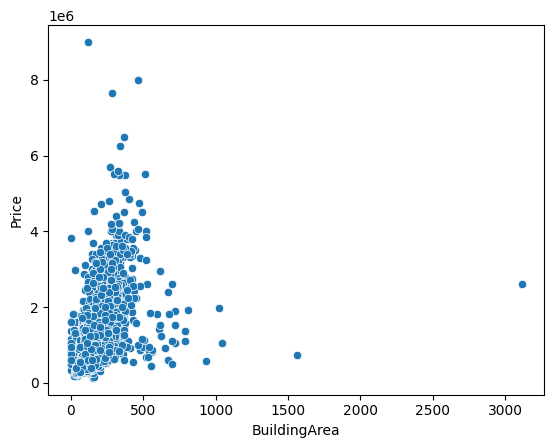

In [4]:
sns.scatterplot(x=melbourne_data['BuildingArea'], y=melbourne_data['Price'])

In [5]:
# wählen für unser Beispiel einen kleinen Ausschnitt aus den Daten
max_area = 400
max_datapoints = 100
data = melbourne_data[melbourne_data['BuildingArea'] < max_area][:max_datapoints][['BuildingArea', 'Price']]
data.head()

,BuildingArea,Price
1,79.0,1035000.0
2,150.0,1465000.0
4,142.0,1600000.0
6,210.0,1876000.0
7,107.0,1636000.0


In [6]:
len(data)

100

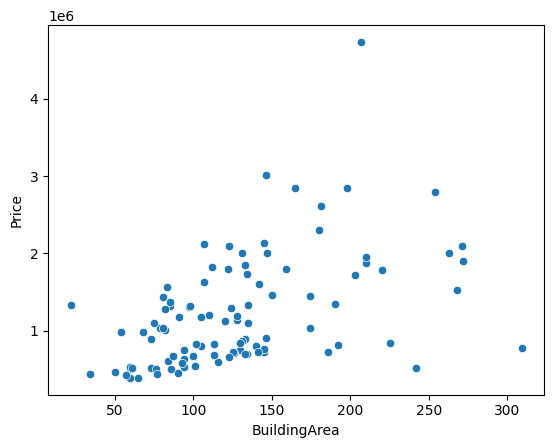

In [7]:
ax = sns.scatterplot(x=data['BuildingArea'], y=data['Price'])

In [8]:
X = []
Y = []
for _, row in data.iterrows():
    X.append([1] + [row['BuildingArea']])
    Y.append(row['Price'])
X = np.array(X)
Y = np.array(Y)
print(X[:5], Y[:5])

[[  1.  79.]
 [  1. 150.]
 [  1. 142.]
 [  1. 210.]
 [  1. 107.]] [1035000. 1465000. 1600000. 1876000. 1636000.]


In [9]:
def h_w(x, w):
    return w[0] + w[1]*x

In [10]:
w_ana = np.linalg.solve(X.T @ X, X.T @ Y)

In [11]:
h_w(x=100, w=w_ana)

1043947.350419555

In [12]:
h_w(x=150, w=w_ana)

1345158.8152134258

In [13]:
h_w(x=np.array([100,150]), w=w_ana)

array([1043947.35041955, 1345158.81521343])

## Analytische Lösung der linearen Regression

`np.linalg.solve(A, b)` berechnet $w$ im linearen Gleichungssystem

$ A w = b $

$A$ - Matrix,
$w$ - Vektor (unsere unbekannten),
$b$ - Vektor.

Wir suchen die Lösung $w$ im folgenden Gleichungssystem:

$$ X^T X w = X^T Y $$

Mit $A = X^TX$ und $b = X^T Y$ berechnet `np.linalg.solve(A, b)` unsere gesuchten Paramter für die lineare Regression.

In [14]:
%%time
w_ana = np.linalg.solve(X.T @ X, X.T @ Y)

CPU times: user 179 µs, sys: 13 µs, total: 192 µs
Wall time: 201 µs


In [15]:
print(w_ana)

[441524.42083181   6024.22929588]


Plot der analytischen Lösung

<Axes: xlabel='BuildingArea', ylabel='Price'>

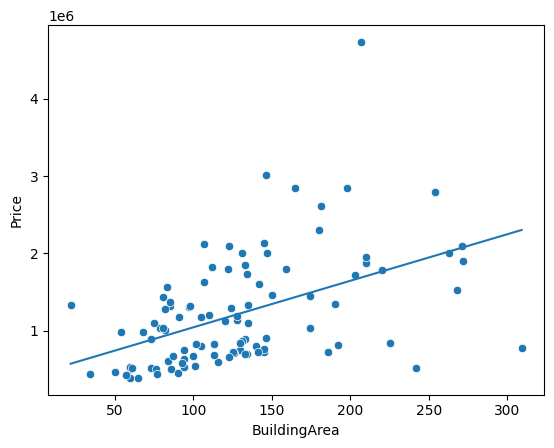

In [16]:
ax = sns.scatterplot(x=data['BuildingArea'], y=data['Price'])

xplot = [min(data['BuildingArea']), max(data['BuildingArea'])]
yplot = [h_w(x, w_ana) for x in xplot]
sns.lineplot(x=xplot, y=yplot, ax=ax)

In [17]:
# Definition der Kostenfunktion
def J(w, x, y):
    """w, x, y müssen numpy arrays sein"""
    errors = y - h_w(x=x, w=w)
    mse = 1.0/(2.0*len(errors)) * ( errors @ errors )
    return mse

In [18]:
x = data['BuildingArea'].to_numpy(copy=True)
y = data['Price'].to_numpy(copy=True)
J_ana = J(w=w_ana, x=x, y=y)
print('Kosten der analytischen Lösung: {}'.format(J_ana))

Kosten der analytischen Lösung: 200141433273.1325


In [19]:
w_ana

array([441524.42083181,   6024.22929588])

## Numerische Lösung mit Gradient Descent

In [20]:
def grad_desc_upd(w, alpha, x, y):
    """y, x sind Vektoren (numpy-arrays)"""
    errors = y - h_w(x=x, w=w)
    w_0_upd = w[0] + alpha / len(x) * sum(errors)
    
    errors_x_x1 = errors @ x
    w_1_upd = w[1] + alpha / len(x) * errors_x_x1
    return [w_0_upd, w_1_upd]

In [21]:
def grad_desc(w, alpha, x, y, n_iterations):
    J_all = [J(w=w, x=x, y=y)]
    for it in range(n_iterations):
        w = grad_desc_upd(w=w, alpha=alpha, x=x, y=y)
        J_all.append(J(w=w, x=x, y=y))
    return w, J_all

In [22]:
def grad_desc_closure(w, alpha, n_iterations, x, y):
    x = x
    y = y
    def grad_desc_upd(w, alpha):
        """y, x sind Vektoren (numpy-arrays)"""
        errors = y - h_w(x=x, w=w)
        w_0_upd = w[0] + alpha / len(x) * sum(errors)
    
        errors_x_x1 = errors @ x
        w_1_upd = w[1] + alpha / len(x) * errors_x_x1
        return [w_0_upd, w_1_upd]
    def grad_desc(w, alpha, n_iterations):
        J_all = [J(w=w, x=x, y=y)]
        for it in range(n_iterations):
            w = grad_desc_upd(w=w, alpha=alpha)
            J_all.append(J(w=w, x=x, y=y))
        return w, J_all
    return grad_desc(w, alpha, n_iterations)
    

In [23]:
%%time
w_tmp, J_tmp = grad_desc(w=[1e5, 1000.], alpha=1e-9, x=data['BuildingArea'].to_numpy(), y=data['Price'].to_numpy(), n_iterations=1_000_000)

CPU times: user 14.3 s, sys: 9.15 ms, total: 14.3 s
Wall time: 14.3 s


In [24]:
%%time
w_tmp, J_tmp = grad_desc_closure(w=[1e5, 1000.], alpha=1e-9, x=data['BuildingArea'].to_numpy(), y=data['Price'].to_numpy(), n_iterations=1_000_000)

CPU times: user 14 s, sys: 19.9 ms, total: 14.1 s
Wall time: 14 s


In [25]:
J_tmp[1]/J_tmp[0]

0.9999715711803561

In [26]:
%%time
n_iterations = 10000
alpha = 0.0001  # mit alpha experimentieren
w_init = [1e6, 1000.]
x = data['BuildingArea'].to_numpy()
y = data['Price'].to_numpy()
w_gd_1e4, J_all_1e4 = grad_desc(w=w_init, alpha=alpha, x=x, y=y, n_iterations=n_iterations)

print('w_gd_1e4: {}'.format(w_gd_1e4))
print('Vergleich zu Startkosten: {}'.format(J_all_1e4[-1]/J_all_1e4[0]))
print('Vergleich zu analytischer Lösung: {}'.format(J_all_1e4[-1]/J_ana))
print('(w0_gd - w0_ana)/w0_ana: {}'.format((w_gd_1e4[0]-w_ana[0])/w_ana[0]))
print('(w1_gd - w1_ana)/w1_ana: {}'.format((w_gd_1e4[1]-w_ana[1])/w_ana[1]))

w_gd_1e4: [915045.6766397625, 2959.2952860626942]
Vergleich zu Startkosten: 0.8899738097177349
Vergleich zu analytischer Lösung: 1.0924465228987312
(w0_gd - w0_ana)/w0_ana: 1.0724690039021065
(w1_gd - w1_ana)/w1_ana: -0.5087678206259779
CPU times: user 149 ms, sys: 0 ns, total: 149 ms
Wall time: 148 ms


In [27]:
%%time
n_iterations = 100000
alpha = 0.0001  # mit alpha experimentieren
w_init = [1e6, 1000.]
x = data['BuildingArea'].to_numpy()
y = data['Price'].to_numpy()
w_gd_1e5, J_all_1e5 = grad_desc(w=w_init, alpha=alpha, x=x, y=y, n_iterations=n_iterations)

print('w_gd_1e5: {}'.format(w_gd_1e5))
print('Vergleich zu Startkosten: {}'.format(J_all_1e5[-1]/J_all_1e5[0]))
print('Vergleich zu analytischer Lösung: {}'.format(J_all_1e5[-1]/J_ana))
print('(w0_gd - w0_ana)/w0_ana: {}'.format((w_gd_1e5[0]-w_ana[0])/w_ana[0]))
print('(w1_gd - w1_ana)/w1_ana: {}'.format((w_gd_1e5[1]-w_ana[1])/w_ana[1]))

w_gd_1e5: [548748.7304152889, 5330.20462625502]
Vergleich zu Startkosten: 0.818522883410924
Vergleich zu analytischer Lösung: 1.0047402160956969
(w0_gd - w0_ana)/w0_ana: 0.24285023551238605
(w1_gd - w1_ana)/w1_ana: -0.11520555336387032
CPU times: user 1.41 s, sys: 2.11 ms, total: 1.42 s
Wall time: 1.41 s


In [28]:
%%time
n_iterations = 300000
alpha = 0.0001  # mit alpha experimentieren
w_init = [1e6, 1000.]
x = data['BuildingArea'].to_numpy()
y = data['Price'].to_numpy()
w_gd_3e5, J_all_3e5 = grad_desc(w=w_init, alpha=alpha, x=x, y=y, n_iterations=n_iterations)

print('w_gd_3e5: {}'.format(w_gd_3e5))
print('Vergleich zu Startkosten: {}'.format(J_all_3e5[-1]/J_all_3e5[0]))
print('Vergleich zu analytischer Lösung: {}'.format(J_all_3e5[-1]/J_ana))
print('(w0_gd - w0_ana)/w0_ana: {}'.format((w_gd_3e5[0]-w_ana[0])/w_ana[0]))
print('(w1_gd - w1_ana)/w1_ana: {}'.format((w_gd_3e5[1]-w_ana[1])/w_ana[1]))

w_gd_3e5: [445476.78736763645, 5998.6470385525045]
Vergleich zu Startkosten: 0.814666460119163
Vergleich zu analytischer Lösung: 1.0000064405958917
(w0_gd - w0_ana)/w0_ana: 0.008951637439163884
(w1_gd - w1_ana)/w1_ana: -0.004246561023568486
CPU times: user 4.24 s, sys: 0 ns, total: 4.24 s
Wall time: 4.24 s


In [29]:
%%time
n_iterations = 1000000
alpha = 0.0001  # mit alpha experimentieren
w_init = [1e6, 1000.]
x = data['BuildingArea'].to_numpy()
y = data['Price'].to_numpy()
w_gd_1e6, J_all_1e6 = grad_desc(w=w_init, alpha=alpha, x=x, y=y, n_iterations=n_iterations)

print('w_gd_1e6: {}'.format(w_gd_1e6))
print('Vergleich zu Startkosten: {}'.format(J_all_1e6[-1]/J_all_1e6[0]))
print('Vergleich zu analytischer Lösung: {}'.format(J_all_1e6[-1]/J_ana))
print('(w0_gd - w0_ana)/w0_ana: {}'.format((w_gd_1e6[0]-w_ana[0])/w_ana[0]))
print('(w1_gd - w1_ana)/w1_ana: {}'.format((w_gd_1e6[1]-w_ana[1])/w_ana[1]))

w_gd_1e6: [441524.4588359625, 6024.2290498901275]
Vergleich zu Startkosten: 0.8146612132155006
Vergleich zu analytischer Lösung: 1.0000000000000007
(w0_gd - w0_ana)/w0_ana: 8.607485222169142e-08
(w1_gd - w1_ana)/w1_ana: -4.0832989140397344e-08
CPU times: user 13.9 s, sys: 30 ms, total: 13.9 s
Wall time: 13.9 s


### Kosten J als Funktion von Gradient Descent Schritten

<Axes: >

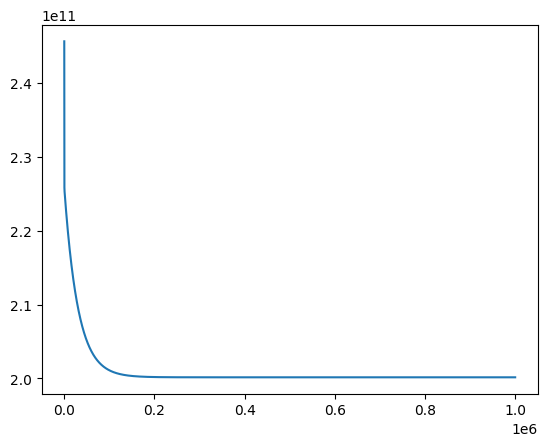

In [30]:
sns.lineplot(x=list(range(len(J_all_1e6))), y=J_all_1e6)

### Plotten der Ergebnisse und Vergleich zwischen analytischer und numerischer Lösung
Nach $10^4$ Schritten des Gradient Descent Algorithmus weicht der lineare Fit noch sichtbar von der analytischen Lösung ab. Nach $10^5$ Schritten ist der Unterschied im Plot nicht mehr zu erkennen.
Die numerische Lösung war in diesem Beispiel deutlich langsamer als die analytische. Allerdings haben wir für die analytische Lösung auch eine effiziente numpy-Implementierung genutzt und für die numerische unoptimierten Python-Code.

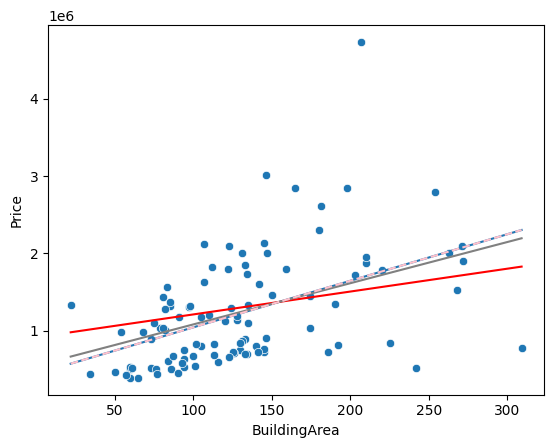

In [31]:
# plot
xplot = [min(data['BuildingArea']), max(data['BuildingArea'])]
yplot_ana = [h_w(x, w_ana) for x in xplot]
yplot_gd_1e4 = [h_w(x, w_gd_1e4) for x in xplot]
yplot_gd_1e5 = [h_w(x, w_gd_1e5) for x in xplot]
# yplot_gd_3e5 = [h_w(x, w_gd_3e5) for x in xplot]
yplot_gd_1e6 = [h_w(x, w_gd_1e6) for x in xplot]
ax = sns.scatterplot(x=data['BuildingArea'], y=data['Price'])
ax = sns.lineplot(x=xplot, y=yplot_ana, ax=ax)
ax = sns.lineplot(x=xplot, y=yplot_gd_1e4, color='red', ax=ax)
ax = sns.lineplot(x=xplot, y=yplot_gd_1e5, color='grey', ax=ax)
# ax = sns.lineplot(x=xplot, y=yplot_gd_3e5, color='green', linestyle='dotted', ax=ax)
ax = sns.lineplot(x=xplot, y=yplot_gd_1e6, color='pink', linestyle='--', ax=ax)

## Vorhersagen unseres Modells

Man kann die Vorhersagen des Modells entweder im Plot oben auf der Geraden ablesen. Zu jedem Wert von `BuildingArea` (x-Achse des Plots) kann so der `Preis` auf der y-Achse abgelesen werden.

Alternativ können wir die von uns oben definierte Funktion `h_w(x, w)` aufrufen. Der Parameter `w` ist die gefunden Lösung und `x` die `BuildingArea` für die wir einen Preis vorhersagen wollen.

In [32]:
# Beispiel: Vorhersage unseres Modells für ein Haus mit Wohnfläche 287:
# wir machen je eine Vorhersage mit
# 1. den analytisch gefundenen Paramtern
# 2. den mit Gradient Descent nach 10^5 Iterationen gefundenen Parametern
# 3. den mit Gradient Descent nach 3*10^5 Iterationen gefundenen Parametern
building_area_new = 287
price_ana = h_w(x=building_area_new, w=w_ana)
price_1e5 = h_w(x=building_area_new, w=w_gd_1e5)
price_3e5 = h_w(x=building_area_new, w=w_gd_3e5)
price_1e6 = h_w(x=building_area_new, w=w_gd_1e6)
print('Preis laut analytischem Modell: {:.2f}'.format(price_ana))
print('Preis laut Gradient Descent Modell nach 10^5 Iterationen: {:.2f}'.format(price_1e5))
print('Preis laut Gradient Descent Modell nach 3*10^5 Iterationen: {:.2f}'.format(price_3e5))
print('Preis laut Gradient Descent Modell nach 1*10^6 Iterationen: {:.2f}'.format(price_1e6))

Preis laut analytischem Modell: 2170478.23
Preis laut Gradient Descent Modell nach 10^5 Iterationen: 2078517.46
Preis laut Gradient Descent Modell nach 3*10^5 Iterationen: 2167088.49
Preis laut Gradient Descent Modell nach 1*10^6 Iterationen: 2170478.20


## $R^2$

In [33]:
x = data['BuildingArea'].to_numpy(copy=True)
y = data['Price'].to_numpy(copy=True)
J_ana = J(w=w_ana, x=x, y=y)
MSE = 2*J_ana
mu_y = sum(y)/len(y)
sigma_y_quadrat = ( (y - mu_y) @ (y - mu_y) ) / len(y)
R2 = 1 - MSE/sigma_y_quadrat
print('erklärte Varianz (R^2): {}'.format(R2))

erklärte Varianz (R^2): 0.22971025499088604
